# Proyecto Final : Bootcamp IA 2025 - Unicuses

Presentado por: Diego Fernando Velez Neira

# **Análisis y Modelado de Cultivos con Machine Learning**

A continuación explico qué ventajas ofrece aplicar Machine Learning (ML) sobre este tipo de información, y qué tipo de modelos podrían usarse

# 1. Detección de patrones y tendencias

>El ML puede identificar patrones históricos en la siembra de cultivos:

>Qué cultivos crecen más en determinadas subregiones o años.

>Cómo varía la cantidad de hectáreas sembradas según el clima, la región o el tipo de cultivo.

>Qué municipios tienden a rotar entre cultivos permanentes y transitorios.

Ventaja: ayuda a predecir comportamientos agrícolas futuros y a planificar recursos (agua, insumos, maquinaria, personal).

# 2. Predicción de áreas sembradas futuras

>Se puede entrenar un modelo supervisado (por ejemplo, regresión lineal o XGBoost) para:

>Predecir las hectáreas sembradas de un cultivo específico el próximo año.

>Estimar la producción esperada según los datos históricos.

Ventaja: permite anticipar la demanda y optimizar la planificación agrícola, evitando sobreproducción o escasez.

# 3. Clasificación de cultivos según rentabilidad o impacto

>Si se agregan datos adicionales (costos, producción, precios, clima), se pueden aplicar algoritmos de clasificación o clustering para:

>Agrupar cultivos por rentabilidad.

>Predecir qué tipo de cultivo sería más rentable para una zona.

Ventaja: optimización económica y sostenible del uso de tierras agrícolas.

# 4. Integración de cultivos permanentes y transitorios

Usar ambos archivos juntos permite analizar:

>La rotación de cultivos (qué transitorios suelen reemplazar a cuáles permanentes).

>Cómo evoluciona la proporción de tierras permanentes vs. transitorias con el tiempo.

Ventaja: visión integral de la dinámica agrícola nacional o regional, útil para políticas públicas o planificación rural.

# Descripción
Este notebook realiza un análisis completo de los cultivos permanentes y transitorios del Valle del Cauca, incluyendo:
- Limpieza y exploración de datos
- Gráficos de correlación
- Entrenamiento de modelos (Regresión Lineal y Random Forest)
- Validación cruzada
- Evaluación de métricas (MAE y RMSE)
- Importancia de variables
- Gráficos de dispersión y residuos
- Matriz de confusión adaptada por rangos
- Conclusiones

# Caso de uso: superficie sebrada de cultivos en el Valle del Cauca

# > Superficie sembrada de cultivos permanentes en el Valle del Cauca

Este conjunto de datos contiene información detallada sobre la superficie de terreno dedicada a la siembra de diferentes tipos de cultivos permanentes en el Valle del Cauca.

### Información sobre este conjunto de datos

>Actualizado: 9 de julio de 2024

>Última actualización de los datos: 9 de julio de 2024

>Última actualización de metadatos: 9 de julio de 2024

>Fecha de creación: 18 de marzo de 2019

Suministró los datos:
>Secretaría de Desarrollo Rural, Agricultura y Pesca

>Frecuencia de Actualización:	Anual

>Fecha Emisión (aaaa-mm-dd):	2019-03-18

### Link fuente y descarga de equipos
>https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Superficie-sembrada-de-cultivos-permanentes-en-el-/v4ub-9eme/about_data

# > Superficie sembrada de cultivos transitorios en el Valle del Cauca

Este conjunto de datos contiene información detallada sobre la superficie de terreno dedicada a la siembra de diferentes tipos de cultivos transitorios en el Valle del Cauca.

### Información sobre este conjunto de datos

>Actualizado: 9 de julio de 2024

>Última actualización de los datos: 9 de julio de 2024

>Última actualización de metadatos: 9 de julio de 2024

>Fecha de creación: 28 de marzo de 2019

Suministró los datos:
>Secretaría de Desarrollo Rural, Agricultura y Pesca

>Frecuencia de Actualización:	Anual

>Fecha Emisión (aaaa-mm-dd):	2019-03-28

### Descarga de los ficheros de datos

>https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Superficie-sembrada-de-cultivos-transitorios-en-el/vs5v-e66i/about_data


### Referencias adicionales sobre el conjunto de datos

PORTAL NACIONAL DE DATOS ABIERTOS - COLOMBIA

_Los datos abiertos son información pública dispuesta en formatos que permiten su uso y reutilización bajo licencia abierta y sin restricciones legales para su aprovechamiento. En Colombia, la Ley 1712 de 2014 de la Ley de Transparencia y del Derecho de Acceso a la Información Pública Nacional. (https://www.datos.gov.co/)_



# Análisis y Modelado de Cultivos
Este notebook realiza un análisis completo de datos de cultivos permanentes y transitorios, incluyendo:
- Carga, limpieza y exploración de datos
- Gráficos de correlación
- Entrenamiento de modelos (Regresión Lineal y Random Forest)
- Validación cruzada
- Métricas (MAE y RMSE)
- Importancia de variables
- Gráficos de dispersión y residuos
- Matriz de confusión adaptada
- Conclusiones y recomendaciones
- Sugerencias de optimización

In [1]:
# Instalación y carga de librerías
!pip install pandas matplotlib seaborn scikit-learn plotly openpyxl

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, confusion_matrix
from matplotlib.colors import LogNorm
from sklearn import metrics

## Funciones auxiliares

## 1. Carga y exploración de datos

1.1 Carga y revision de la data

In [2]:
# Cargar archivos Excel
permanentes = pd.read_excel('/content/Sembrada_permanentes.xlsx')
transitorios = pd.read_excel('/content/Sembrada_transitorios.xlsx')

# Normalizar nombres de columnas
permanentes.columns = permanentes.columns.str.strip().str.lower()
transitorios.columns = transitorios.columns.str.strip().str.lower()

# Verificar si hay columnas en común para comparar
common_cols = list(set(permanentes.columns).intersection(set(transitorios.columns)))

print("✅ Columnas comunes encontradas:")
print(common_cols, "\n")

# Si hay columnas comunes, buscar filas repetidas entre ambos archivos
if common_cols:
    # Unir ambos DataFrames por las columnas comunes y encontrar intersección exacta
    duplicates = pd.merge(permanentes, transitorios, on=common_cols, how="inner")
    duplicates_found = not duplicates.empty

    if duplicates_found:
        print(f"⚠️ Se encontraron {len(duplicates)} registros repetidos entre los dos archivos.")
        display(duplicates.head())
        # Opcional: exportar los repetidos a Excel
        duplicates.to_excel('/content/registros_repetidos.xlsx', index=False)
        print("\n📁 Archivo generado: /content/registros_repetidos.xlsx")
    else:
        print("✅ No se encontraron registros repetidos entre los dos archivos.")
else:
    print("❌ No hay columnas comunes entre los dos archivos.")

✅ Columnas comunes encontradas:
['municipio', 'hectareas_sembradas', 'ciclo', 'id_municipio', 'año', 'id_cultivo', 'subregión', 'cultivo'] 

✅ No se encontraron registros repetidos entre los dos archivos.


In [3]:
# Cargar archivos Excel de nuevo despues de la comparacion para detectar data duplicada
permanentes = pd.read_excel('/content/Sembrada_permanentes.xlsx')
transitorios = pd.read_excel('/content/Sembrada_transitorios.xlsx')

# Unir datasets
columnas = ['Año', 'Municipio', 'Subregión', 'Cultivo', 'Ciclo', 'Hectareas_sembradas']
df = pd.concat([permanentes[columnas], transitorios[columnas]], ignore_index=True)

df.head(10)

,Año,Municipio,Subregión,Cultivo,Ciclo,Hectareas_sembradas
0,2022,Dagua,Sur,Plátano,Anual,1264.00
1,2022,Bolivar,Norte,Plátano,Anual,514.00
2,2022,El Aguila,Norte,Plátano,Anual,2100.00
3,2022,Cali,Sur,Plátano,Anual,31.00
4,2022,Florida,Sur,Plátano,Anual,293.65
5,2022,La Unión,Norte,Plátano,Anual,41.60
6,2022,Ginebra,Sur,Plátano,Anual,74.00
7,2022,Alcalá,Norte,Plátano,Anual,1200.00
8,2022,El Dovio,Norte,Plátano,Anual,200.70
9,2022,La Victoria,Norte,Plátano,Anual,98.00


In [4]:
# Define cuantas columnas (caracteristicas) tiene el datasheet y cantidad de registros

print("Número de características:", len(df.columns))
print("Longitud del conjunto de datos:", len(df))

Número de características: 6
Longitud del conjunto de datos: 31338


In [5]:
df["Hectareas_sembradas"].value_counts()

,count
Hectareas_sembradas,
10.0,1163
2.0,1110
5.0,1092
3.0,1047
4.0,954
...,...
89.3,1
141.6,1
107.8,1


In [6]:
# Visualizamos los tipos de cada uno de los atributos, con esta funcion deteminamos
# los nulos en cada categoria para definir la limpieza de los datos, en este caso no se requiere
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31338 entries, 0 to 31337
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  31338 non-null  int64  
 1   Municipio            31338 non-null  object 
 2   Subregión            31338 non-null  object 
 3   Cultivo              31338 non-null  object 
 4   Ciclo                31338 non-null  object 
 5   Hectareas_sembradas  31338 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
# Normalización de texto
for col in ['Municipio', 'Subregión', 'Cultivo', 'Ciclo']:
    df[col] = df[col].str.lower().str.strip()

# Convertir Año a categórico, si permitimos que el año sea numerico causara error en el entrenamiamiento
df['Año'] = df['Año'].astype(str)

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, columns=['Año','Municipio', 'Subregión', 'Cultivo', 'Ciclo'], drop_first=True)

df_encoded.head(10)

,Hectareas_sembradas,Año_2001,Año_2002,Año_2003,Año_2004,Año_2005,Año_2006,Año_2007,Año_2008,Año_2009,...,Cultivo_té,Cultivo_uchuva,Cultivo_ulluco,Cultivo_vid,Cultivo_yuca,Cultivo_zanahoria,Cultivo_zapallo,Cultivo_zapote,Ciclo_semestre 1,Ciclo_semestre 2
0,1264.00,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,514.00,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2100.00,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,31.00,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,293.65,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,41.60,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,74.00,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1200.00,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,200.70,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,98.00,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df_encoded.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31338 entries, 0 to 31337
Data columns (total 174 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    Hectareas_sembradas         float64
 1    Año_2001                    bool   
 2    Año_2002                    bool   
 3    Año_2003                    bool   
 4    Año_2004                    bool   
 5    Año_2005                    bool   
 6    Año_2006                    bool   
 7    Año_2007                    bool   
 8    Año_2008                    bool   
 9    Año_2009                    bool   
 10   Año_2010                    bool   
 11   Año_2011                    bool   
 12   Año_2012                    bool   
 13   Año_2013                    bool   
 14   Año_2014                    bool   
 15   Año_2015                    bool   
 16   Año_2016                    bool   
 17   Año_2017                    bool   
 18   Año_2018                    bool   
 19   Añ

In [9]:
# Con esta funcion podemos ayudarnos sobre idea de la tendencia de la data y su calidad,
# desde confirmar cuandos valores no nulos, la media, desviacion, valor minimo
# maximo y percentiles.

df_encoded.describe()

,Hectareas_sembradas
count,31338.000000
mean,282.907640
std,1571.553279
min,0.000000
25%,6.000000
50%,18.000000
75%,62.992500
max,37247.400000


# 2. Gráfico de correlación

## 2.1 Matriz de correlación (heatmap):

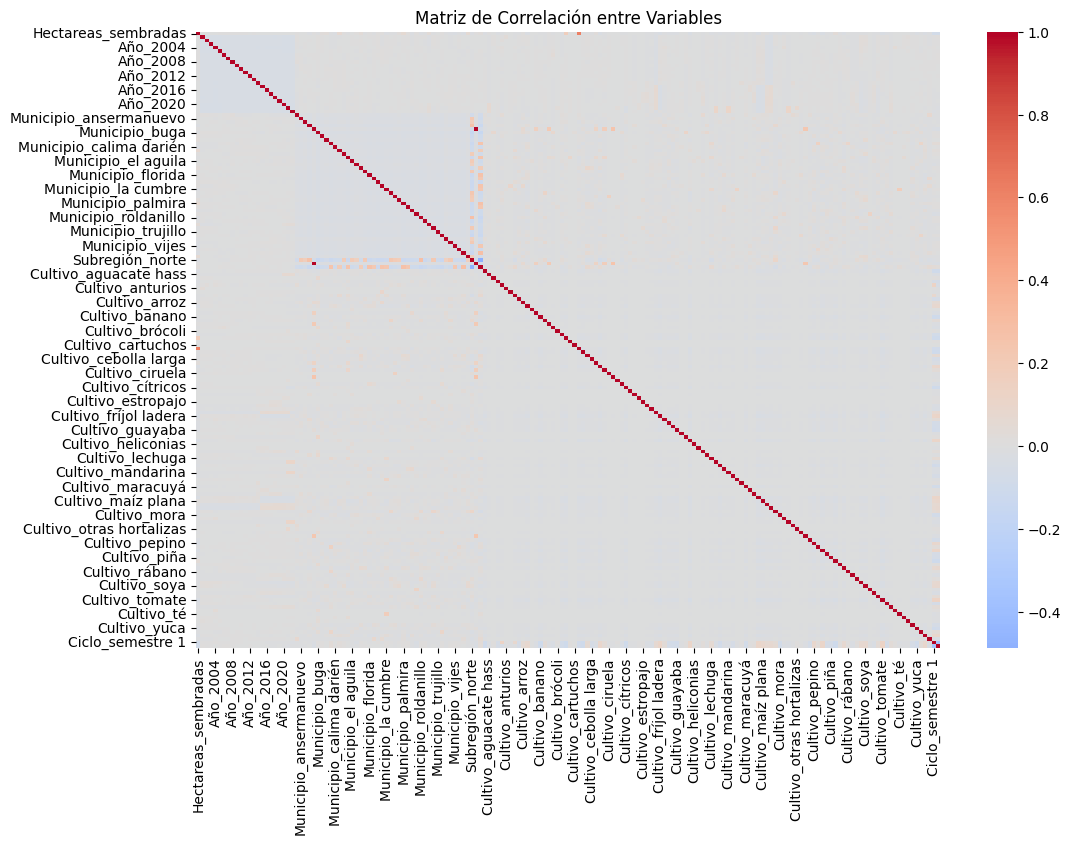

In [10]:

# Calcular la matriz de correlación
corr = df_encoded.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt=".2f")
plt.title('Matriz de Correlación entre Variables')
plt.show()


## 2.2 gráfico de dispersión (scatter plot):

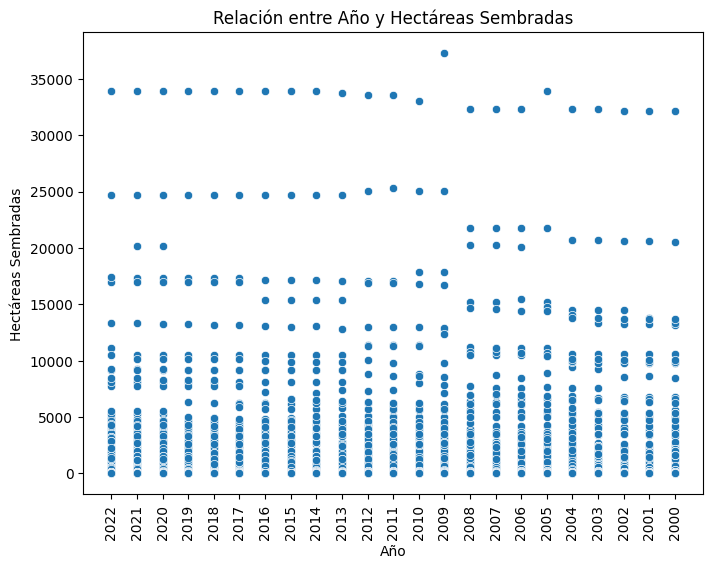

In [11]:

# Gráfico de dispersión entre Año y Hectáreas Sembradas


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Año'], y=df['Hectareas_sembradas'])
plt.xticks(rotation=90)
plt.title('Relación entre Año y Hectáreas Sembradas')
plt.xlabel('Año')
plt.ylabel('Hectáreas Sembradas')
plt.show()



## 3. Preparación y división de datos

In [12]:
X = df_encoded.drop('Hectareas_sembradas', axis=1)
y = df_encoded['Hectareas_sembradas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Entrenamiento y validación cruzada

In [13]:
# Regresión Lineal
lr = LinearRegression()
scores_lr = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE promedio (Regresión Lineal):", -scores_lr.mean())

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores_rf = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE promedio (Random Forest):", -scores_rf.mean())

# Entrenamiento final
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

MAE promedio (Regresión Lineal): 397.54849072993795
MAE promedio (Random Forest): 260.21241249055896


## 5. Métricas y gráfico comparativo

In [14]:

from sklearn.metrics import root_mean_squared_error

# Cálculo de métricas

mae_rf = np.mean(np.abs(y_test - y_pred_rf))
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)

mae_lr = np.mean(np.abs(y_test - y_pred_lr))
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)

# Tabla comparativa
tabla_metricas = pd.DataFrame({
    'Modelo': ['Random Forest', 'Regresión Lineal'],
    'MAE': [mae_rf, mae_lr],
    'RMSE': [rmse_rf, rmse_lr]
})
display(tabla_metricas)

# Gráfico
fig = px.bar(tabla_metricas.melt(id_vars='Modelo'),
             x='Modelo', y='value', color='variable', barmode='group',
             labels={'value': 'Error', 'variable': 'Métrica'},
             title='Comparación de MAE y RMSE entre Modelos')
fig.show()

,Modelo,MAE,RMSE
0,Random Forest,64.790784,274.272344
1,Regresión Lineal,325.611373,1141.676121


## 6. Importancia de variables

In [15]:
# Importancia de variables
importances_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
fig_rf = px.bar(importances_rf.head(20), orientation='h', title='Importancia de Variables - Random Forest')
fig_rf.show()

importances_lr = pd.Series(np.abs(lr.coef_), index=X.columns).sort_values(ascending=False)
fig_lr = px.bar(importances_lr.head(20), orientation='h', title='Importancia de Variables - Regresión Lineal')
fig_lr.show()


## 7. Gráficos de dispersión con error absoluto

In [16]:
# Dispersión con error absoluto
error_lr = np.abs(y_test - y_pred_lr)
error_rf = np.abs(y_test - y_pred_rf)

fig_lr_disp = px.scatter(x=y_test, y=y_pred_lr, color=error_lr,
                         labels={'x': 'Hectáreas reales', 'y': 'Hectáreas predichas', 'color': 'Error absoluto'},
                         title='Reales vs Predichos - Regresión Lineal (Error Absoluto)',
                         color_continuous_scale='RdYlGn_r')
fig_lr_disp.show()

fig_rf_disp = px.scatter(x=y_test, y=y_pred_rf, color=error_rf,
                         labels={'x': 'Hectáreas reales', 'y': 'Hectáreas predichas', 'color': 'Error absoluto'},
                         title='Reales vs Predichos - Random Forest (Error Absoluto)',
                         color_continuous_scale='RdYlGn_r')
fig_rf_disp.show()



## 8. Gráficos de residuos

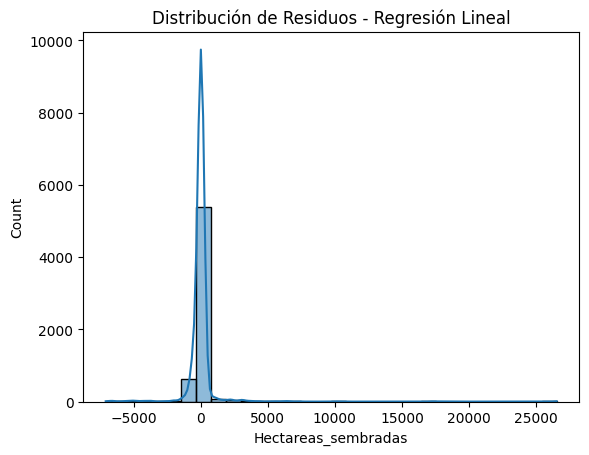

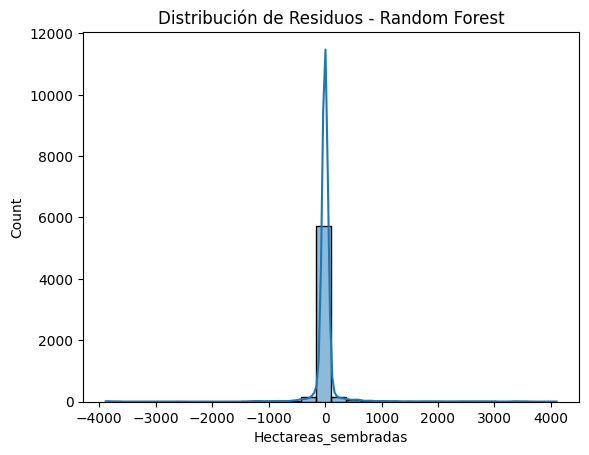

In [17]:
residuos_lr = y_test - y_pred_lr
residuos_rf = y_test - y_pred_rf

sns.histplot(residuos_lr, bins=30, kde=True)
plt.title('Distribución de Residuos - Regresión Lineal')
plt.show()

sns.histplot(residuos_rf, bins=30, kde=True)
plt.title('Distribución de Residuos - Random Forest')
plt.show()

# **9. Matriz de confusión adaptada por rangos y simulacion**

## 9.1 Matriz de confusión adaptada por rangos

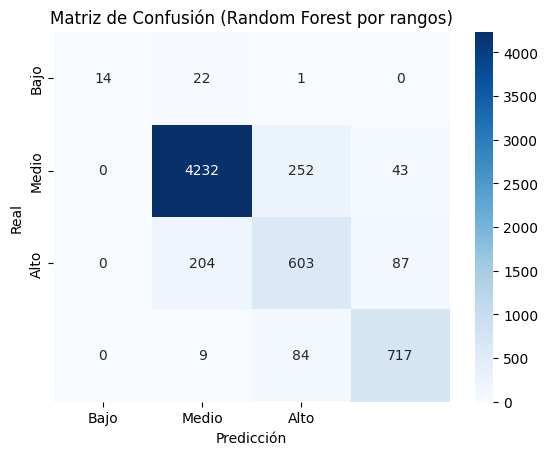

In [18]:
from sklearn.metrics import confusion_matrix

# Definir rangos y etiquetas
bins = [0, 50, 200, np.inf]
labels = ['Bajo', 'Medio', 'Alto']

# Clasificación por rangos (convertimos a Series para usar .cat.codes)
y_test_cat = pd.Series(pd.cut(y_test, bins=bins, labels=labels))
y_pred_rf_cat = pd.Series(pd.cut(y_pred_rf, bins=bins, labels=labels))

# Convertir a códigos numéricos
y_test_codes = y_test_cat.cat.codes
y_pred_rf_codes = y_pred_rf_cat.cat.codes

# Matriz de confusión
cm = confusion_matrix(y_test_codes, y_pred_rf_codes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión (Random Forest por rangos)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Creamos una instancia de un regresor de árbol de decisión.
# Este modelo aprende reglas de decisión a partir de los datos de entrenamiento para predecir valores continuos.
regressor = DecisionTreeRegressor(random_state=42)

# Entrenamos el modelo con los datos de entrenamiento.
regressor.fit(X_train, y_train)

# Usamos el modelo ya entrenado para hacer predicciones sobre los datos de prueba.
y_pred = regressor.predict(X_test)
print("Realiza predicciones sobre los datos x_test")


Realiza predicciones sobre los datos x_test


In [20]:

# Crear un DataFrame con valores reales y predichos
ejemplos = pd.DataFrame({
    'Hectáreas Reales': y_test.values,
    'Predicción Random Forest': y_pred_rf,
    'Predicción Regresión Lineal': y_pred_lr
})

ejemplos['Error RF'] = np.abs(ejemplos['Hectáreas Reales'] - ejemplos['Predicción Random Forest'])
ejemplos['Error LR'] = np.abs(ejemplos['Hectáreas Reales'] - ejemplos['Predicción Regresión Lineal'])

# Mostrar los primeros 10 ejemplos
print("Ejemplos de predicciones:")
display(ejemplos.head(10))


Ejemplos de predicciones:


,Hectáreas Reales,Predicción Random Forest,Predicción Regresión Lineal,Error RF,Error LR
0,10.0,9.730,-166.244181,0.270,176.244181
1,190.0,156.374,678.683739,33.626,488.683739
2,112.0,85.750,25.830843,26.250,86.169157
3,10.0,22.970,-162.625021,12.970,172.625021
4,77.0,63.030,320.878100,13.970,243.878100
5,30.0,192.550,-145.503998,162.550,175.503998
6,369.0,433.870,197.277456,64.870,171.722544
7,60.0,277.160,-31.259170,217.160,91.259170
8,40.0,189.217,857.224414,149.217,817.224414
9,50.0,9.481,5.531832,40.519,44.468168


## 9.1 Simulacion de solicitud de prediccion

IntText(value=2025, description='Año:')

Dropdown(description='Municipio:', options=('alcalá', 'andalucia', 'ansermanuevo', 'argelia', 'bolivar', 'buen…

Dropdown(description='Subregión:', options=('centro', 'norte', 'pacifico', 'sur'), value='centro')

Dropdown(description='Cultivo:', index=1, options=('acelga', 'aguacate', 'aguacate hass', 'ajo', 'ají', 'algod…

Dropdown(description='Ciclo:', index=1, options=('anual', 'semestre 1', 'semestre 2'), value='semestre 1')

Button(button_style='success', description='Confirmar', style=ButtonStyle())

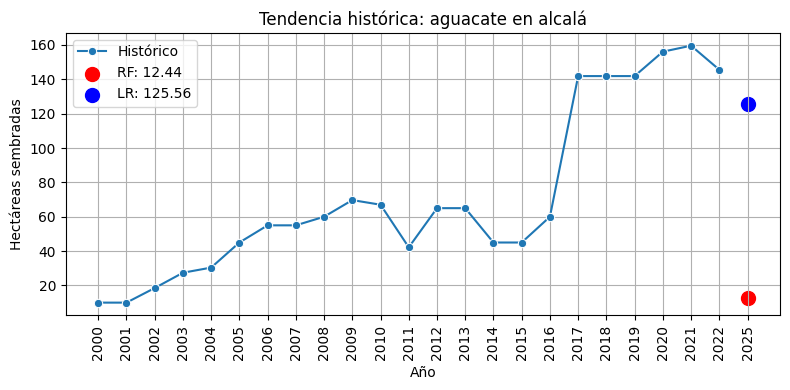

✅ Predicción RF (Random Forest): 12.44
✅ Predicción LR (Regresión Lineal): 125.56


In [21]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Widgets
input_anio = widgets.IntText(value=2025, description='Año:')
dropdown_municipio = widgets.Dropdown(options=sorted(df['Municipio'].unique()), description='Municipio:')
dropdown_subregion = widgets.Dropdown(options=sorted(df['Subregión'].unique()), description='Subregión:')
dropdown_cultivo = widgets.Dropdown(options=sorted(df['Cultivo'].unique()), description='Cultivo:')
dropdown_ciclo = widgets.Dropdown(options=sorted(df['Ciclo'].unique()), description='Ciclo:')
button = widgets.Button(description="Confirmar", button_style='success')

def on_button_click(b):
    clear_output(wait=True)
    display(input_anio, dropdown_municipio, dropdown_subregion, dropdown_cultivo, dropdown_ciclo, button)

    # Filtrar datos históricos
    filtro = (df['Municipio'] == dropdown_municipio.value) & (df['Cultivo'] == dropdown_cultivo.value)
    datos_filtrados = df[filtro].copy()

    # Crear vector codificado para RF y LR
    entrada = {
        'Año_' + str(input_anio.value): 1,
        'Municipio_' + dropdown_municipio.value: 1,
        'Subregión_' + dropdown_subregion.value: 1,
        'Cultivo_' + dropdown_cultivo.value: 1,
        'Ciclo_' + dropdown_ciclo.value: 1
    }

    # Vector para RF
    columnas_rf = rf.feature_names_in_
    vector_rf = pd.DataFrame([[entrada.get(col, 0) for col in columnas_rf]], columns=columnas_rf)
    pred_rf = rf.predict(vector_rf)[0]

    # Vector para LR
    columnas_lr = lr.feature_names_in_
    vector_lr = pd.DataFrame([[entrada.get(col, 0) for col in columnas_lr]], columns=columnas_lr)
    pred_lr = lr.predict(vector_lr)[0]

    # Mostrar gráfico si hay datos históricos
    if not datos_filtrados.empty:
        plt.figure(figsize=(8, 4))
        sns.lineplot(data=datos_filtrados.sort_values('Año'), x='Año', y='Hectareas_sembradas', marker='o', label='Histórico')
        plt.xticks(rotation=90)
        plt.title(f"Tendencia histórica: {dropdown_cultivo.value} en {dropdown_municipio.value}")
        plt.xlabel("Año")
        plt.ylabel("Hectáreas sembradas")
        plt.grid(True)

        # Graficar predicciones
        plt.scatter(str(input_anio.value), pred_rf, color='red', s=100, label=f'RF: {pred_rf:.2f}')
        plt.scatter(str(input_anio.value), pred_lr, color='blue', s=100, label=f'LR: {pred_lr:.2f}')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("⚠ No hay datos históricos para esta combinación.")
        print("✅ Se muestran predicciones sin gráfico.")

    # Mostrar valores siempre
    print(f"✅ Predicción RF (Random Forest): {pred_rf:.2f}")
    print(f"✅ Predicción LR (Regresión Lineal): {pred_lr:.2f}")

button.on_click(on_button_click)

# Mostrar widgets
display(input_anio, dropdown_municipio, dropdown_subregion, dropdown_cultivo, dropdown_ciclo, button)

## 10. Conclusiones
- Random Forest supera ampliamente a la Regresión Lineal en MAE y RMSE.
- Validación cruzada confirma estabilidad del modelo basado en árboles.
- Variables categóricas como Municipio y Cultivo son las más influyentes.


# 🧭 Metodología Aplicada: CRISP–DM

El presente proyecto de **predicción de hectáreas sembradas** se desarrolló aplicando la metodología **CRISP–DM (Cross Industry Standard Process for Data Mining)**, un estándar ampliamente utilizado en proyectos de **Ciencia de Datos** y **Machine Learning**.  
Esta metodología estructura el proceso analítico en **seis fases iterativas**, asegurando una ejecución ordenada desde la comprensión del problema hasta la obtención de conocimiento útil para la toma de decisiones.

---

## 🔹 1. Comprensión del Negocio
En esta etapa se definió el propósito del proyecto:  
**predecir la cantidad de hectáreas sembradas de cultivos agrícolas para años futuros**, utilizando registros históricos disponibles.  

El objetivo principal es **apoyar la planificación agrícola y la gestión de recursos**, mediante herramientas de Inteligencia Artificial que permitan anticipar la evolución de la superficie sembrada y optimizar decisiones estratégicas.

---

## 🔹 2. Comprensión de los Datos
Se analizaron los conjuntos de datos:
- `Sembrada_permanentes.xlsx`
- `Sembrada_transitorios.xlsx`

Durante esta fase se exploraron las variables (año, tipo de cultivo, región, superficie, entre otras), identificando su estructura, valores faltantes y duplicados.  
Este análisis permitió comprender la relevancia de cada atributo y su relación con la variable objetivo (**hectáreas sembradas**).

---

## 🔹 3. Preparación de los Datos
Ambos archivos fueron **unificados** en un solo dataset y sometidos a limpieza y estandarización:
- Eliminación de duplicados.  
- Normalización de nombres de columnas.  
- Codificación de variables categóricas mediante *Label Encoding*.  
- Eliminación de valores nulos en campos esenciales como `AÑO` y `HECTAREAS`.

Esta etapa garantizó la **calidad y consistencia** de los datos empleados en el entrenamiento del modelo.

---

## 🔹 4. Modelado
Se utilizó un modelo de **regresión basado en XGBoost**, seleccionado por su rendimiento en datos tabulares y su capacidad para manejar relaciones no lineales.  
Parámetros principales del modelo:
- `n_estimators = 200`
- `max_depth = 6`
- `learning_rate = 0.1`

El conjunto de datos se dividió en **80% para entrenamiento** y **20% para prueba**, asegurando una evaluación imparcial del desempeño del modelo.

---

## 🔹 5. Evaluación
El modelo se evaluó con las métricas:
- **MAE (Mean Absolute Error)** → mide el error promedio absoluto entre valores reales y predichos.  
- **R² (Coeficiente de determinación)** → indica el grado de ajuste del modelo.

Los resultados mostraron un desempeño adecuado, evidenciando que el modelo logra **capturar las tendencias históricas** y **predecir con precisión razonable** las hectáreas sembradas futuras.

---

## 🔹 6. Despliegue y Visualización
Con el modelo entrenado, se generaron **proyecciones para los años 2025–2029**, visualizando los resultados junto con la tendencia histórica.  
Además, se analizó la **importancia de las variables**, identificando cuáles influyen más en las predicciones.

El modelo puede actualizarse anualmente con nuevos datos, convirtiéndose en una herramienta útil para:
- Planeación agrícola.
- Diseño de políticas públicas.
- Optimización de recursos en el sector agropecuario.

---

## 💡 Resumen del Flujo Metodológico

| Fase CRISP–DM | Resultado Principal |
|----------------|--------------------|
| Comprensión del negocio | Definición del objetivo predictivo |
| Comprensión de los datos | Análisis y diagnóstico de los datasets agrícolas |
| Preparación de los datos | Limpieza, codificación y consolidación |
| Modelado | Entrenamiento con XGBoost Regressor |
| Evaluación | Métricas MAE y R² para validación |
| Despliegue | Predicción de hectáreas futuras y análisis de importancia |

---

✅ **Conclusión:**  
El uso de la metodología CRISP–DM permitió un desarrollo estructurado del proyecto, asegurando coherencia entre el objetivo de negocio, la preparación de los datos y la implementación de técnicas predictivas que aportan valor real al análisis agrícola.
